# Homework 2

In this notebook, replace the comment block with an actual code.
The job is to select one specific solvent, and build a model with that solvent.
State the solvent that you select in a text block!

This are the link to dataset:

https://raw.githubusercontent.com/afriwahyudi/datasets/main/amines/lists_of_amines_VLE.csv

In [38]:
# IMPORT YOUR LIBRARY HERE

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

#scale the data
from sklearn.preprocessing import StandardScaler

In [39]:
# IMPORT THE DATASET FROM GITHUB LINK

url = "https://raw.githubusercontent.com/afriwahyudi/datasets/main/amines/lists_of_amines_VLE.csv"
df = pd.read_csv(url)
df.head(10)

df.shape

(3096, 9)

In [40]:
# SELECT YOUR SOLVENT AND FILTER BY REFERENCE

"""This should be changed as Amine and Reference"""

# Identify all the amine names and references in a dataframe
amine_names = df['Abbreviation'].unique()
amine_refs = df['References'].unique()
print("Amine Names:", amine_names)
print("Amine References:", amine_refs)

# Pick a abbreviation name and reference
amine_name = 'MAE'
amine_ref = 'Kumar et al (2012)'
print("Amine Name:", amine_name)
print("Amine Reference:", amine_ref)

# Filter the dataframe by the amine name and reference
df = df[(df['Abbreviation'] == amine_name) & (df['References'] == amine_ref)]
df.head(100)

df.shape

Amine Names: ['AEPZ' 'HEPR' 'DMAE' 'DAH' '1A2P' '1DMA2P' '1EPZ' '1MPZ' '1PE' 'DGA'
 'AEAE' '2DMA2M1P' '2DMAE' 'EAE' 'IPAE' 'MAE' 'PAE' 'tBAE' 'DMAEE' 'AMPD'
 'AMP' 'MEA' '2MPZ' 'PZE' '2PE' '3A1P' 'DMAP' '3PM' 'HEEAB' 'HEMAB'
 '2APMCH' '4DBA2B' 'DEAB' '4DPA2B' '4A1B' 'BA' 'DEA' 'DETA' 'DIPA' 'EDA'
 'M4M' 'MDEA' 'MO' 'MPD' 'DEAE' 'TBDEA' 'PZ' 'PR' 'SBA' 'SE' 'TEPA' 'TEA'
 'TE' 'TETA' 'TIPA' 'HMAE' 'DMPZ' '5A1P' 'IBA' 'AEPD' 'EMAB' 'BDEA'
 '4DMA2B' '2BAE']
Amine References: ['Dey et al (2019)' 'Chowdury et al (2013)' 'Xiao et al (2016)'
 'Nouacer et al (2013)' 'El Hadri et al (2016)' 'Mondal et al (2015)'
 'Singh et.al (2007)' 'Puxty et. al (2009)'
 'Rebolledo-Morales et al (2010)' 'Liu et al (2017)'
 'Li and Rochelle (2014)' 'Xi and Rochelle (2011)' 'Li et al (2015)'
 'Ebrahiminejadhasanabadi et al (2021)' 'Rayer et al (2014)'
 "Ma'mun et.al (2006)" 'Zhang et al (2022)' 'Tong (2012)'
 'Hwang et al (2017)' 'Yamada et al (2013)' 'Kumar et al (2012)'
 'Narku-Tetteh et al (2017)' 'Baek et al

(73, 9)

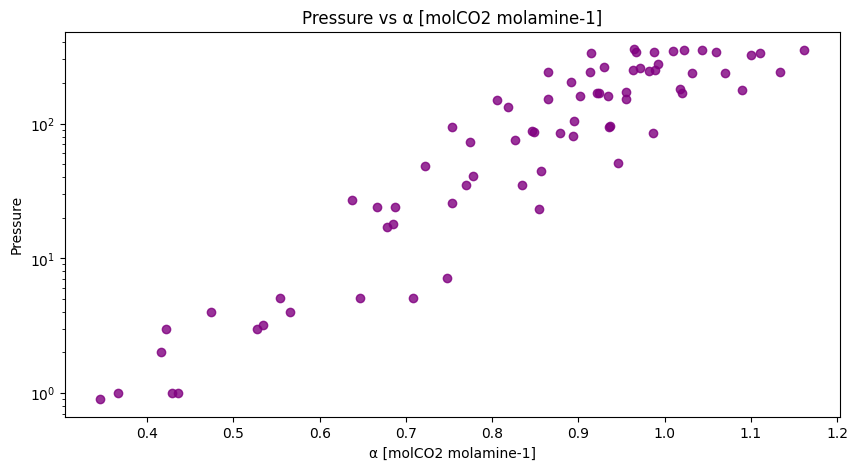

In [41]:
# DATA PREPROCESSING HERE (DATASPLITTING, SCALING IF REQUIRED)

#Take 3 process parameters as X and 1 process parameter as Y
X = df[['PCO2 [kPa]', 'Temp [K]','Rounded concentration [M]']]
y = df['α [molCO2 molamine-1]']

#combine the X and y dataframes
df = pd.concat([X, y], axis=1)

#seperate pressure and α [molCO2 molamine-1] as new variables
pressure = df['PCO2 [kPa]']
alpha = df['α [molCO2 molamine-1]']

#plot the data
plt.scatter(alpha, pressure, color='purple', alpha=0.8, figure=plt.figure(figsize=(10, 5)))
plt.title('Pressure vs α [molCO2 molamine-1]')
plt.xlabel('α [molCO2 molamine-1]')
plt.ylabel('Pressure')
plt.yscale('log')
plt.show()

#split the data into training, validation and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1234)

#keep dataset for later use
X_train_original = X_train
X_val_original = X_val
X_test_original = X_test

#scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)



In [46]:
# BUILD YOUR MODEL HERE (JUST USE WHAT WORKS)

#build the model
model = MLPRegressor(hidden_layer_sizes=(100, 50, 20, 10), activation='relu', solver='adam', max_iter=1000, random_state=42)

#train the scaled model
model.fit(X_train_scaled, y_train)

#predict the scaled model
y_pred = model.predict(X_val_scaled)

#train the original model
model.fit(X_train_original, y_train)

#predict the original model
y_pred_original = model.predict(X_val_original) 

Train set performance:
R2 score: 0.8687753775507663
MAE: 0.0563180321796547
MSE: 0.004787170179186851
RMSE: 0.06918937909236396



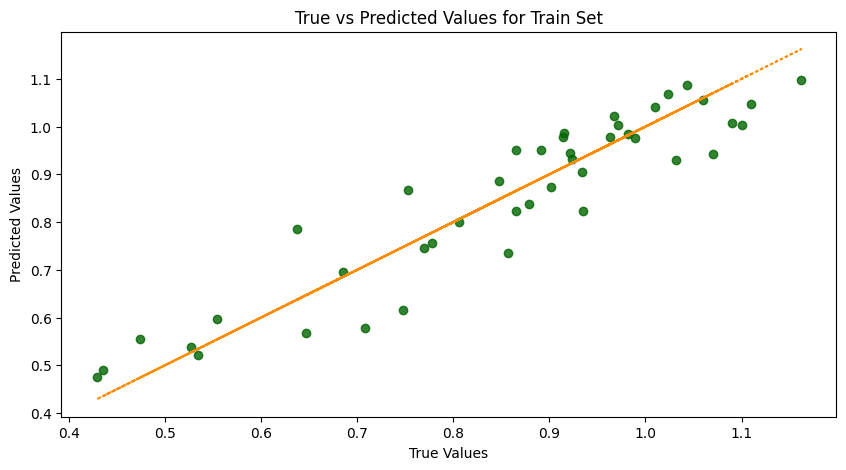

Validation set performance:
R2 score: 0.7999801987732695
MAE: 0.08417442288464295
MSE: 0.009788245444844192
RMSE: 0.0989355620838341



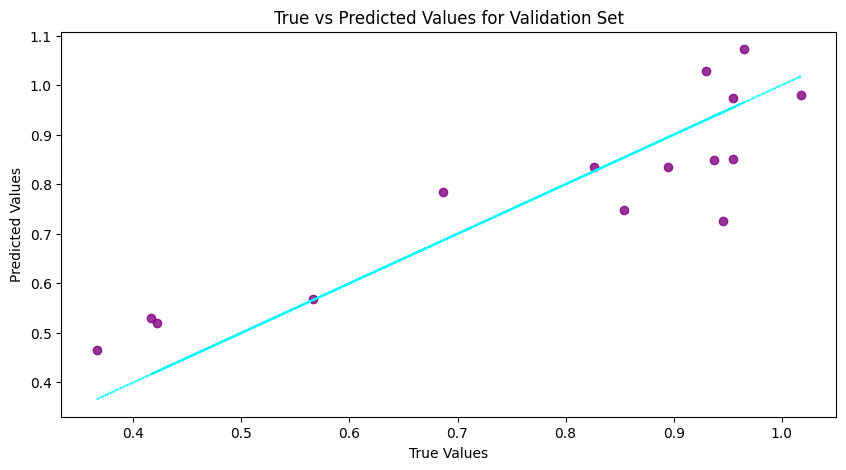

Test set performance:
R2 score: 0.7920771359459835
MAE: 0.06863212341194355
MSE: 0.007127702975559373
RMSE: 0.08442572460784316



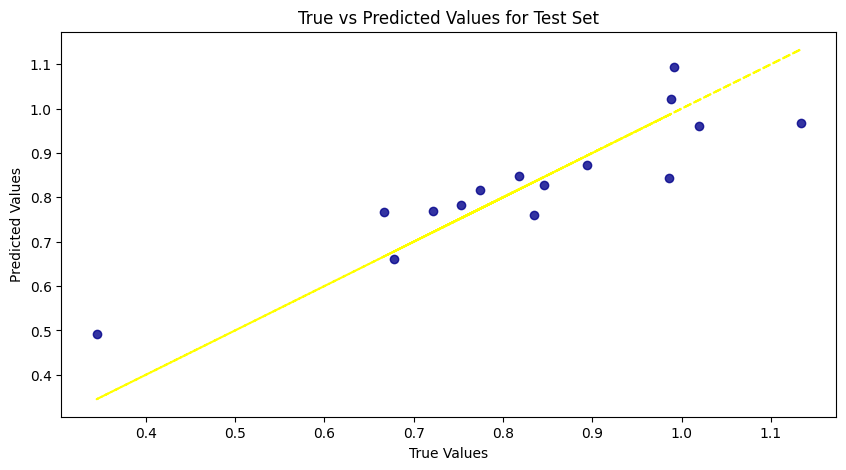

In [57]:
# EVALUATE THE MODEL (USE VALIDATION AND TESTING SET HERE) for Original Data

#evaluate performance of the train set and plot true vs predicted values
print('Train set performance:')
print('R2 score:', r2_score(y_train, model.predict(X_train_original)))
print('MAE:', mean_absolute_error(y_train, model.predict(X_train_original)))
print('MSE:', mean_squared_error(y_train, model.predict(X_train_original)))
print('RMSE:', np.sqrt(mean_squared_error(y_train, model.predict(X_train_original))))
print('')
plt.scatter(y_train, model.predict(X_train_original), color='darkgreen', alpha=0.8, figure=plt.figure(figsize=(10, 5)))
plt.plot(y_train, y_train, color='darkorange', linestyle='dotted')
plt.title('True vs Predicted Values for Train Set')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

#evaluate performance of the validation set and plot true vs predicted values
print('Validation set performance:')
print('R2 score:', r2_score(y_val, y_pred_original))
print('MAE:', mean_absolute_error(y_val, y_pred_original))
print('MSE:', mean_squared_error(y_val, y_pred_original))
print('RMSE:', np.sqrt(mean_squared_error(y_val, y_pred_original)))
print('')
plt.scatter(y_val, y_pred_original, color='purple', alpha=0.8, figure=plt.figure(figsize=(10, 5)))
plt.plot(y_val, y_val, color='cyan', linestyle='dotted')
plt.title('True vs Predicted Values for Validation Set')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

#evaluate performance of the test set and plot true vs predicted values
print('Test set performance:')
print('R2 score:', r2_score(y_test, model.predict(X_test_original)))
print('MAE:', mean_absolute_error(y_test, model.predict(X_test_original)))
print('MSE:', mean_squared_error(y_test, model.predict(X_test_original)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, model.predict(X_test_original))))
print('')
plt.scatter(y_test, model.predict(X_test_original), color='darkblue', alpha=0.8, figure=plt.figure(figsize=(10, 5)))
plt.plot(y_test, y_test, color='yellow', linestyle='dashed')
plt.title('True vs Predicted Values for Test Set')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


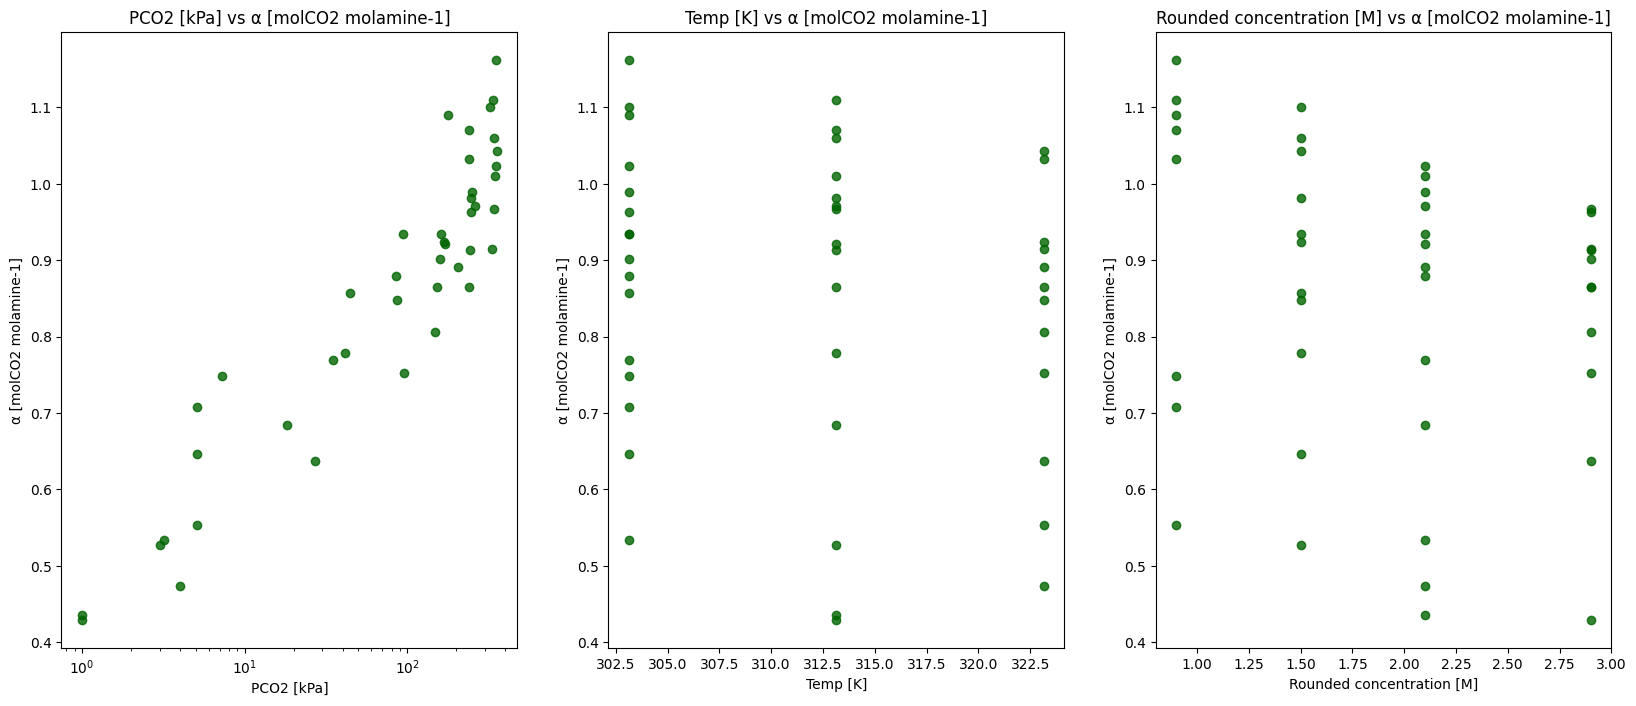

In [64]:
# VISUALIZE THE RESULTS HERE

#plot 3 features against α [molCO2 molamine-1]
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.scatter(X_train['PCO2 [kPa]'], y_train, color='darkgreen', alpha=0.8)
plt.title('PCO2 [kPa] vs α [molCO2 molamine-1]')
plt.xlabel('PCO2 [kPa]')
plt.ylabel('α [molCO2 molamine-1]')
plt.xscale('log')
plt.subplot(1, 3, 2)
plt.scatter(X_train['Temp [K]'], y_train, color='darkgreen', alpha=0.8)
plt.title('Temp [K] vs α [molCO2 molamine-1]')
plt.xlabel('Temp [K]')
plt.ylabel('α [molCO2 molamine-1]')
plt.subplot(1, 3, 3)
plt.scatter(X_train['Rounded concentration [M]'], y_train, color='darkgreen', alpha=0.8)
plt.title('Rounded concentration [M] vs α [molCO2 molamine-1]')
plt.xlabel('Rounded concentration [M]')
plt.ylabel('α [molCO2 molamine-1]')
plt.show()

Lastly, justify your result!

Compared to Train set performance:
R2 score: 0.8687753775507663

The Test set performance:
R2 score: 0.7920771359459835

seems significant accuracy in this model. MLP Regressor works without any overfitting of the model unlike to the descision tree or random forrest algorythm.

Only the scalling performed in X_train data set omitting validation and test data sets to avoid data leakage and under this circumstance this model not biased on predicting data based on the features.

PCO2 shows linear relationship on alpha when it shows in log(scale). 

NB :- Yet, I am not fluent in creating 3D plot after analysing, this results generated in 3 different graphs here.